In [68]:
import glob; import sys; import os
import pandas as pd
import functions
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from matplotlib.lines import Line2D
from math import ceil


pd.options.mode.chained_assignment = None
plt.rcParams.update({'font.size': 20}) # Set a good font size

# Defining constants
G = 1.908e5 # R_sol*(M_sol)^-1*km^2*s^-2 
pc2AU = 206265 # Pc -> AU
Rsol2AU = 0.00465047 # Rsol -> AU
pcMyr2kms = 1.023 # Pc/Myr -> km/s
Myr2s = 3600*24*265.25 * 1e6
c = 3e5 # km/s

In [72]:
dataDir = functions.get_Started()

Possible Directories:

0 : COMPAS_Output_1%sol_fallback
1 : COMPAS_Output_1%sol_noKicks
2 : COMPAS_Output_1%sol_reduced
3 : COMPAS_Output_1%_correctedEVO
4 : COMPAS_Output_1%_no_CHE
5 : COMPAS_Output_1%_pessCHE
6 : COMPAS_Output_largea_detailed
7 : COMPAS_Output_largea_detailed2
8 : COMPAS_Output_noBHKick_Z0.0001
9 : COMPAS_Output_noBHKick_Z0.001
10 : COMPAS_Output_noChem
11 : COMPAS_Output_PeTar_M100000
12 : COMPAS_Output_smalla_detailed
13 : COMPAS_Output_smalla_detailed2
14 : COMPAS_Output_sol_correctEVO
15 : COMPAS_Output_sol_no_CHE
16 : COMPAS_Output_SSE_Z0.00015
17 : COMPAS_Output_SSE_Z0.0015
18 : COMPAS_Output_test
19 : COMPAS_Output_test2
20 : COMPAS_Output_Z0.0001
21 : COMPAS_Output_Z0.00015
22 : COMPAS_Output_Z0.0005
23 : COMPAS_Output_Z0.00075
24 : COMPAS_Output_Z0.001
25 : COMPAS_Output_Z0.0015
26 : COMPAS_Output_Z0.005
27 : COMPAS_Output_Z0.0075
28 : COMPAS_Output_Z0.01
29 : COMPAS_Output_Z0.01_varied



What directory is the data stored in?    14


In [70]:
dataDict = functions.get_Started(Comparing=True)

Possible Directories:

0 : COMPAS_Output_1%sol_fallback
1 : COMPAS_Output_1%sol_noKicks
2 : COMPAS_Output_1%sol_reduced
3 : COMPAS_Output_1%_correctedEVO
4 : COMPAS_Output_1%_no_CHE
5 : COMPAS_Output_1%_pessCHE
6 : COMPAS_Output_largea_detailed
7 : COMPAS_Output_largea_detailed2
8 : COMPAS_Output_noBHKick_Z0.0001
9 : COMPAS_Output_noBHKick_Z0.001
10 : COMPAS_Output_noChem
11 : COMPAS_Output_PeTar_M100000
12 : COMPAS_Output_smalla_detailed
13 : COMPAS_Output_smalla_detailed2
14 : COMPAS_Output_sol_correctEVO
15 : COMPAS_Output_sol_no_CHE
16 : COMPAS_Output_SSE_Z0.00015
17 : COMPAS_Output_SSE_Z0.0015
18 : COMPAS_Output_test
19 : COMPAS_Output_test2
20 : COMPAS_Output_Z0.0001
21 : COMPAS_Output_Z0.00015
22 : COMPAS_Output_Z0.0005
23 : COMPAS_Output_Z0.00075
24 : COMPAS_Output_Z0.001
25 : COMPAS_Output_Z0.0015
26 : COMPAS_Output_Z0.005
27 : COMPAS_Output_Z0.0075
28 : COMPAS_Output_Z0.01
29 : COMPAS_Output_Z0.01_varied



What directory is the data stored in?    6,7,12,13



Currently selected datasets:
dict_keys(['largea_detailed', 'largea_detailed2', 'smalla_detailed', 'smalla_detailed2'])


Are these all of the datasets to compare?[y/n] y


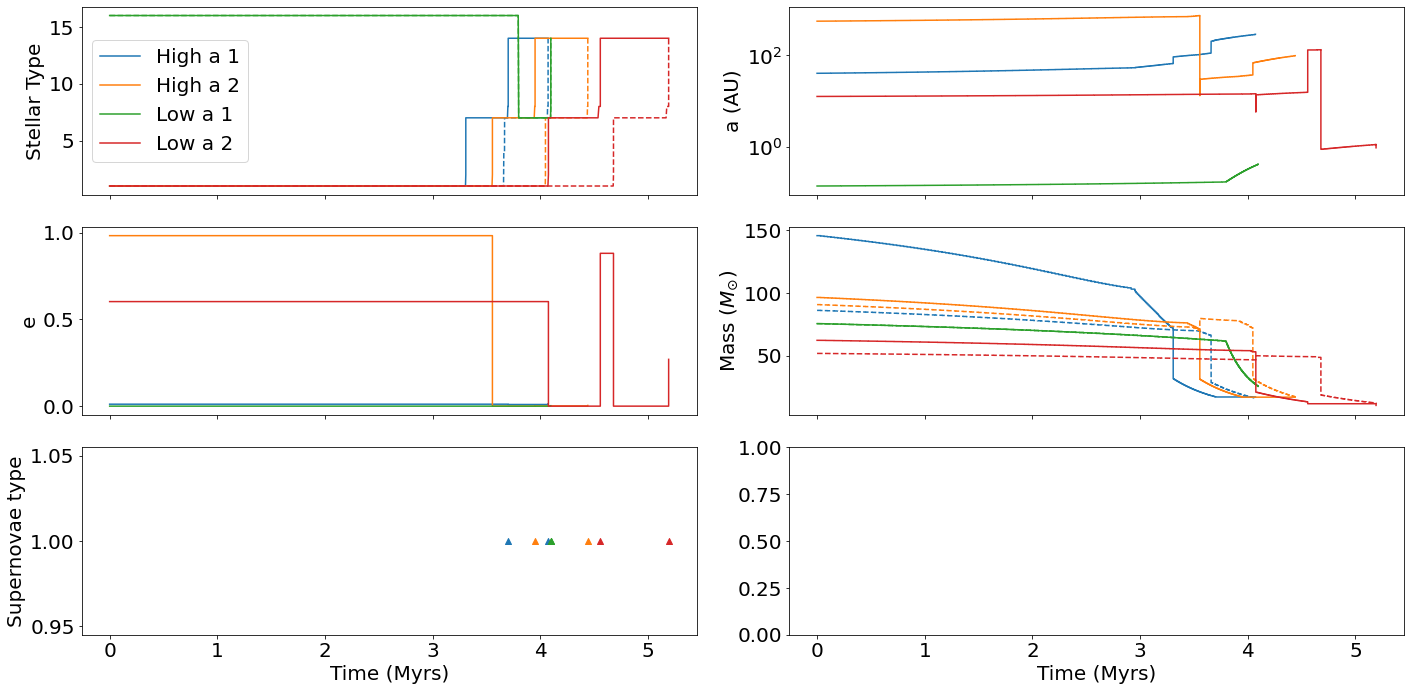

In [71]:
fig, ax = plt.subplots(3, 2, figsize=(20,10), sharex=True)

colors=['C0', 'C1', 'C2', 'C3']
labels = ['High a 1', 'High a 2', 'Low a 1', 'Low a 2']
count=0
for key, item in dataDict.items():
    DO = pd.read_csv(os.path.join(item, 'Detailed_Output/BSE_Detailed_Output_0.csv'), skiprows=2)
    
    SN = pd.read_csv(os.path.join(item, 'BSE_Supernovae.csv'), skiprows=2)
    
    # Plot the stellar type
    ax[0,0].plot(DO['      Time      '], DO['Stellar_Type(1)'], color=colors[count], label=labels[count])
    ax[0,0].plot(DO['      Time      '], DO['Stellar_Type(2)'], color=colors[count], linestyle='--')
    
    
    # Plot the semimajor axis
    ax[0,1].plot(DO['      Time      '], DO['SemiMajorAxis ']*Rsol2AU)
    
    # Plot the eccentricity
    ax[1,0].plot(DO['      Time      '], DO[' Eccentricity '])
    
    # Plot the stellar masses 
    ax[1,1].plot(DO['      Time      '], DO['   Mass(1)    '], color=colors[count])
    ax[1,1].plot(DO['      Time      '], DO['   Mass(2)    '], color=colors[count], linestyle='--')
    
    ax[2,0].scatter(SN['      Time      '], SN['SN_Type(SN)'], marker='^')
    
    
    count+=1

#     # Plotting
#     # Plot the stellar type
#     ax[0,0].plot(DO['      Time      '], DO['Stellar_Type(1)'], color='C2')
#     ax[0,0].plot(DO['      Time      '], DO['Stellar_Type(2)'], color='C2', linestyle='--')
#     # Plot the semimajor axis
#     ax[0,1].plot(DO['      Time      '], DO['SemiMajorAxis ']*Rsol2AU )
#     # Plot the eccentricity
#     ax[1,0].plot(DO['      Time      '], DO[' Eccentricity '] )
#     # Plot the stellar masses 
#     ax[1,1].plot(DO['      Time      '], DO['   Mass(1)    '], color='C2')
#     ax[1,1].plot(DO['      Time      '], DO['   Mass(2)    '], color='C2', linestyle='--')
#     ax[2,0].scatter(SN['      Time      '], SN['SN_Type(SN)'], marker='^')
    
    
    
    
ax[0,0].set_ylabel('Stellar Type')

ax[0,1].set_ylabel('a (AU)')
ax[0,1].set_yscale('log')

ax[1,0].set_ylabel('e')

ax[1,1].set_ylabel('Mass ($M_{\odot}$)')

ax[2,0].set_ylabel('Supernovae type')

ax[2,0].set_xlabel('Time (Myrs)')
ax[2,1].set_xlabel('Time (Myrs)')


ax[0,0].legend(loc='center left')
fig.tight_layout()

Now look at the old datafiles, they don't have detailed output but they do have RLOF files 

In [75]:
SP = pd.read_csv(os.path.join(dataDir, 'BSE_System_Parameters.csv'), skiprows=2)
SP = SP.loc[SP['Equilibrated_At_Birth']!=1] # Remove systems which have equilibrated at birth (CHE effect)

DCO = pd.read_csv(os.path.join(dataDir, 'BSE_Double_Compact_Objects.csv'), skiprows=2)
DCO = DCO.loc[DCO['    SEED    '].isin(SP['    SEED    '])]

BBH = DCO.loc[(DCO['Stellar_Type(1)']==14)&(DCO['Stellar_Type(2)']==14)]

In [78]:
# Selected binary with id 2632028566
RLOF = pd.read_csv(os.path.join(dataDir, 'BSE_RLOF.csv'), skiprows=2)
RLOF

,SEED>MT,Mass(1)>MT,Mass(2)>MT,Radius(1)>MT,Radius(2)>MT,Type(1)>MT,Type(2)>MT,SemiMajorAxis>MT,Eccentricity>MT,Event_Counter>MT,...,RLOF(1)<MT,RLOF(2)<MT,Zeta_Soberman(1),Zeta_SoberMan_He(1),Zeta_Hurley(1),Zeta_Hurley_He(1),Zeta_Soberman(2),Zeta_SoberMan_He(2),Zeta_Hurley(2),Zeta_Hurley_He(2)
0,2632028564,50.180960,13.856600,21.243330,4.889411,1,1,43.053010,0.0,1,...,0,0,-0.333333,-0.333333,0.3,0.3,-0.333333,-0.333333,0.3,0.3
1,2632028566,15.521730,65.634280,1.226406,17.341840,7,1,690.088900,0.0,1,...,0,0,-0.333333,0.000000,0.3,0.0,-0.333333,-0.333333,0.3,0.3
2,2632028566,7.466613,23.252330,0.000032,1.568355,14,7,47.332300,0.0,2,...,0,0,0.000000,0.000000,0.0,0.0,-0.333333,0.000000,0.3,0.0
3,2632028567,8.050412,5.884527,0.819251,2.755301,7,1,8.444777,0.0,1,...,0,0,-0.333333,0.000000,0.3,0.0,-0.333333,-0.333333,0.3,0.3
4,2632028569,16.824910,21.112050,1.288219,7.261158,7,1,478.031000,0.0,1,...,0,0,-0.333333,0.000000,0.3,0.0,-0.333333,-0.333333,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664452,2632128557,27.746620,7.863264,1.745731,3.259838,7,1,67.851360,0.0,1,...,0,0,-0.333333,0.000000,0.3,0.0,-0.333333,-0.333333,0.3,0.3
664453,2632128557,15.753850,1.560700,0.000067,0.282651,14,7,1565.656000,0.0,2,...,0,0,0.000000,0.000000,0.0,0.0,-0.333333,0.000000,0.3,0.0
664454,2632128557,15.753850,1.324413,0.000067,0.003842,14,11,1922.205000,0.0,3,...,0,0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
664455,2632128558,6.367763,23.945590,0.708043,8.144949,7,1,449.961500,0.0,1,...,0,0,-0.333333,0.000000,0.3,0.0,-0.333333,-0.333333,0.3,0.3


In [79]:
testBinary = RLOF.loc[RLOF['  SEED>MT   ']==2632028566]
testBinary

,SEED>MT,Mass(1)>MT,Mass(2)>MT,Radius(1)>MT,Radius(2)>MT,Type(1)>MT,Type(2)>MT,SemiMajorAxis>MT,Eccentricity>MT,Event_Counter>MT,...,RLOF(1)<MT,RLOF(2)<MT,Zeta_Soberman(1),Zeta_SoberMan_He(1),Zeta_Hurley(1),Zeta_Hurley_He(1),Zeta_Soberman(2),Zeta_SoberMan_He(2),Zeta_Hurley(2),Zeta_Hurley_He(2)
1,2632028566,15.521730,65.63428,1.226406,17.341840,7,1,690.0889,0.0,1,...,0,0,-0.333333,0.0,0.3,0.0,-0.333333,-0.333333,0.3,0.3
2,2632028566,7.466613,23.25233,0.000032,1.568355,14,7,47.3323,0.0,2,...,0,0,0.000000,0.0,0.0,0.0,-0.333333,0.000000,0.3,0.0
